In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mw_alarms = pd.read_csv('../data/alarm_project_hitsz/mw_alarms_encoded.csv')
mw_alarms.head()

,Alarm Name,Domain,First Occurrence,Cleared On,Last Occurrence,Site ID,Site Name,Alarm Source,Agent,Alert Key,Alarm Type
0,ETH_LOS,MW,2019-04-12 03:23:00,2019-04-12 15:28:41,2019-04-12 15:27:48,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,b7b4b653b59e800d1e11b5c477473291,da76555823aa688749a7b10fa570d329,5-EMS4-3(PORT-3)-MAC:1,Not defined
1,MW_RDI,MW,2019-04-12 03:24:36,2019-04-12 15:19:55,2019-04-12 15:19:03,291fa1abcd81c7cc981f5221fd391eca,c16cfbf539fc3364388826082aa80063,a0717c6f69afd72cc85fa0608de930ee,da76555823aa688749a7b10fa570d329,3-ISU2-1(RTNIF-1)-RTNIF:1,Not defined
2,ETH_LOS,MW,2019-04-12 02:53:51,2019-04-12 15:14:50,2019-04-12 15:14:48,2bbdea935cc77a0e83013891e8e811e6,5e7cf62fbc8f02efaa83b30397550982,6adc1959ac4fbb8ef708186a0128a113,da76555823aa688749a7b10fa570d329,1-EM6T-6(PORT-6)-MAC:1,Not defined
3,ETH_LOS,MW,2019-04-12 02:50:45,2019-04-12 15:13:08,2019-04-12 15:13:05,1ae126c9b29fa88770ac40121aede076,cb20db136c9e60c55e9ae52fe3091763,4b994ef1493dc438296a71ec8d489a47,da76555823aa688749a7b10fa570d329,1-EM6T-6(To RTN 320)-MAC:1,Not defined
4,ETH_LOS,MW,2019-04-12 03:19:20,2019-04-12 15:12:38,2019-04-12 15:12:35,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,fcdc79899d47e6d65c6f4c8ce7f2d18d,da76555823aa688749a7b10fa570d329,5-EMS4-4(PORT-4)-MAC:1,Not defined


In [3]:
mw_alarms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4655592 entries, 0 to 4655591
Data columns (total 11 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Alarm Name        object
 1   Domain            object
 2   First Occurrence  object
 3   Cleared On        object
 4   Last Occurrence   object
 5   Site ID           object
 6   Site Name         object
 7   Alarm Source      object
 8   Agent             object
 9   Alert Key         object
 10  Alarm Type        object
dtypes: object(11)
memory usage: 390.7+ MB


In [4]:
mw_alarms.isnull().sum()

Alarm Name            0
Domain                0
First Occurrence      0
Cleared On          561
Last Occurrence       0
Site ID               0
Site Name             0
Alarm Source          0
Agent                 0
Alert Key             0
Alarm Type            0
dtype: int64

In [5]:
ran_alarms = pd.read_csv('../data/alarm_project_hitsz/ran_alarms_encoded.csv')
ran_alarms.head()

,Alarm Name,Domain,First Occurrence,Cleared On,Last Occurrence,Site ID,Site Name,Alarm Source,Agent,Alert Key,Alarm Type
0,Fan Stalled,RAN-4G,2019-04-12 18:44:40,2019-04-26 22:05:55,2019-04-12 18:44:40,5c62d39fbba6b5e462f746bb71e632ab,7f59239ca71b02fcba3c164cdb58fcb0,5c62d39fbba6b5e462f746bb71e632ab,c38aff427818485569a0f15c857f349c,"Cabinet No.=0, Subrack No.=8, Slot No.=0, Fan ...",Equipment
1,Sensor Failure,RAN-4G,2019-04-12 18:44:40,2019-04-12 18:49:23,2019-04-12 18:44:40,57de3f4d81d11c28d268b1d8ea88c14e,dac97e5ecb5a2866f95b47b625f51575,57de3f4d81d11c28d268b1d8ea88c14e,93ddf1f692ea5279fc0ae6a18a29e9e6,"Cabinet No.=1, Subrack No.=11, Slot No.=0, Sen...",Equipment
2,Local Cell Unusable,RAN-4G,2019-04-12 18:44:40,2019-04-12 18:45:18,2019-04-12 18:44:40,be19c68bfea8e5a05371e3be7ac5d043,e572da2bb5188449253c1d7489387f42,be19c68bfea8e5a05371e3be7ac5d043,bda0748cece08292afefcd72b35b25ac,"NodeB Function Name=100568_Ciledug-Regol_3G, L...",Quality of Service
3,Cell Unavailable,RAN-4G,2019-04-12 18:44:40,2019-04-12 18:46:27,2019-04-12 18:44:40,5c62d39fbba6b5e462f746bb71e632ab,7f59239ca71b02fcba3c164cdb58fcb0,5c62d39fbba6b5e462f746bb71e632ab,c38aff427818485569a0f15c857f349c,"eNodeB Function Name=082521_DMT-KaliBalok_4G, ...",Processing error
4,SCTP Link Fault,RAN-4G,2019-04-12 18:44:40,2019-04-12 18:46:56,2019-04-12 18:44:40,5c62d39fbba6b5e462f746bb71e632ab,7f59239ca71b02fcba3c164cdb58fcb0,5c62d39fbba6b5e462f746bb71e632ab,c38aff427818485569a0f15c857f349c,"Link No.=1000, Description=NULL, Peer IP Addre...",Communications


In [6]:
ran_alarms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1544060 entries, 0 to 1544059
Data columns (total 11 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Alarm Name        1532634 non-null  object
 1   Domain            1152748 non-null  object
 2   First Occurrence  1544060 non-null  object
 3   Cleared On        1542776 non-null  object
 4   Last Occurrence   1544060 non-null  object
 5   Site ID           1544060 non-null  object
 6   Site Name         1544060 non-null  object
 7   Alarm Source      1544060 non-null  object
 8   Agent             1544060 non-null  object
 9   Alert Key         1528628 non-null  object
 10  Alarm Type        1544060 non-null  object
dtypes: object(11)
memory usage: 129.6+ MB


In [7]:
ran_alarms.isnull().sum()

Alarm Name           11426
Domain              391312
First Occurrence         0
Cleared On            1284
Last Occurrence          0
Site ID                  0
Site Name                0
Alarm Source             0
Agent                    0
Alert Key            15432
Alarm Type               0
dtype: int64

In [8]:
topology_data = pd.read_csv('../data/alarm_project_hitsz/topology_encoded.csv')
topology_data.head()

,PathID,SERVICE_FLOW_NAME,NE_NAME,NE_TYPE,PATH_HOP
0,094c2b8ecc9dc564432c91cd6716f6bc,094c2b8ecc9dc564432c91cd6716f6bc,83fc7cfd587db142017f6054f0c7ac8f,NODEB,0
1,094c2b8ecc9dc564432c91cd6716f6bc,094c2b8ecc9dc564432c91cd6716f6bc,2ad9f5d287773bf5b539a78223872f25,MICROWAVE,1
2,094c2b8ecc9dc564432c91cd6716f6bc,094c2b8ecc9dc564432c91cd6716f6bc,e0dda6e46790c3f5e4eca1279fc1a569,MICROWAVE,2
3,094c2b8ecc9dc564432c91cd6716f6bc,094c2b8ecc9dc564432c91cd6716f6bc,78c6f3710215a32fbd9d5370d0f68950,ROUTER,3
4,c06365339b914c79b20c5e9f1bd9a4e6,c06365339b914c79b20c5e9f1bd9a4e6,7dd1911a6ea9fa4ae4579d0d5caa7236,NODEB,0


In [9]:
topology_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129466 entries, 0 to 129465
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   PathID             129466 non-null  object
 1   SERVICE_FLOW_NAME  129466 non-null  object
 2   NE_NAME            129466 non-null  object
 3   NE_TYPE            129466 non-null  object
 4   PATH_HOP           129466 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 4.9+ MB


In [10]:
topology_data.isnull().sum()

PathID               0
SERVICE_FLOW_NAME    0
NE_NAME              0
NE_TYPE              0
PATH_HOP             0
dtype: int64

In [11]:
vocabulary_data = pd.read_csv('../data/alarm_project_hitsz/vocabulary.csv')
vocabulary_data.head()

,source,code
0,,7215ee9c7d9dc229d2921a40e899ec5f
1,010010,694e8aa59106dc7486c12dd71435c093
2,010010_Blang Bintang Lama - Seupeu,f1594c396dc4e0b8d6ff37a9bc4ab260
3,010010_Blang Bintang Lama - Seupeu_IDU1,48afe227fdc3b003f3c5def15d23fc70
4,010010_Blang_Bintang_Lama_Seupeu_3G&&RSGACH170...,f056ece30fe9271bbe666246e79efb84


In [12]:
alarm_graph = np.load('../data/alarm_project_hitsz/preprocessed/G', allow_pickle=True)

In [13]:
len(alarm_graph.nodes)

41143

In [14]:
len(alarm_graph.edges)

41683

In [15]:
len(topology_data['NE_NAME'].unique()) == len(alarm_graph.nodes)

True

In [16]:
list(alarm_graph.nodes)

['83fc7cfd587db142017f6054f0c7ac8f',
 '2ad9f5d287773bf5b539a78223872f25',
 'e0dda6e46790c3f5e4eca1279fc1a569',
 '78c6f3710215a32fbd9d5370d0f68950',
 '7dd1911a6ea9fa4ae4579d0d5caa7236',
 '9d0b387292085c0fbc6e72ffdd0d033c',
 'b3f0e798b8abbb16d915ac7e36698808',
 '45b91d4df492c75d051889730cc99936',
 '63dbd1746abcb68b9ae9ec26c12cbbf9',
 '050f16483d27cd0309d2e3a7df1beb7b',
 '3c79c886ff4581563c7102054c0a0c81',
 'c5f778c6b4e9b779a36735a2b13a95c5',
 '4e4d4b22229cf1036cc4934e27d5f46a',
 '2e826c04fd8741cc376d71731323fb10',
 'af1ee57ffc52d175b2f885e3197e5fd4',
 '421fabc423b4b5753007f923c3fa3efc',
 '507897254b66720aadf3af9b6a62e1b0',
 'adb28ddce52f0b8e1e2c677c0cd8ff5b',
 '5e44777898292c78dcb58c0513e0be21',
 'c27f3765c6a96b29eaaf221b98237d91',
 'c27dc4620cdc51c0918cdfebcf2e0c90',
 'f348778f4c0a12261c42dc2938494f3f',
 'a4c824d9dd1b564c9e396051ee109a12',
 'a234ae4103540998db1e308dd310db33',
 'f4826991d239958a887f57210d1db8dc',
 '7381f96839fc0ee36062ac8c40498e0e',
 '47a3ec3c8adb7d6271dbdceceebd252b',
 

In [17]:
alarm_graph.nodes[list(alarm_graph.nodes)[2]]
# 字典中第一个键值对表示节点的类型，其余表示在这个节点上发生的告警及其时间。

{'NE_TYPE': 'MICROWAVE',
 'MW_LOF': [187981, 312258, 314104, 318022, 320430, 327272],
 'RADIO_RSL_LOW': [312259, 314106, 318024, 320432, 327274],
 'MW_RDI': [187981, 189939, 341611]}

In [18]:
mw_alarms_after_preprocessing = pd.read_csv('../data/alarm_project_hitsz/preprocessed/mw_alarms_after_processing.csv')
mw_alarms_after_preprocessing.head()

,Alarm Name,Domain,First Occurrence,Cleared On,Last Occurrence,Site ID,Site Name,Alarm Source,Agent,Alert Key,Alarm Type,Duration
0,ETH_LOS,MW,12180,55721,2019-04-12 15:27:48,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,b7b4b653b59e800d1e11b5c477473291,da76555823aa688749a7b10fa570d329,5-EMS4-3(PORT-3)-MAC:1,Not defined,43541
1,MW_RDI,MW,12276,55195,2019-04-12 15:19:03,291fa1abcd81c7cc981f5221fd391eca,c16cfbf539fc3364388826082aa80063,a0717c6f69afd72cc85fa0608de930ee,da76555823aa688749a7b10fa570d329,3-ISU2-1(RTNIF-1)-RTNIF:1,Not defined,42919
2,LAG_MEMBER_DOWN,MW,11018,54580,2019-04-12 15:09:39,50c0cf263a315a1c680d32e0153ec504,cf88c483f61b6fb2d9c8d1f30f33d238,93d12c8c0f20dc481cc584c6ca4b7a64,da76555823aa688749a7b10fa570d329,LINK AGGREGATION GROUP:(2:91300),Not defined,43562
3,ETH_LOS,MW,10166,54574,2019-04-12 15:09:30,6c1ebfcb49241c100c8ba919d2d1740d,0575081e6511caabc550eb99257da89a,140047f873e264ab5531a7e79c5a45a2,da76555823aa688749a7b10fa570d329,17-EG6-4(GUL)-MAC:1,Not defined,44408
4,ETH_LOS,MW,10002,54542,2019-04-12 15:09:00,d82499e9ed4df59e451ce9bce5a886cc,54df8197a494f39af7249241888e7489,acc331e94b53bdeaeda0799c755b3730,da76555823aa688749a7b10fa570d329,17-EG6-4(PORT-4)-MAC:1,Not defined,44540


In [19]:
mw_alarms_after_preprocessing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251734 entries, 0 to 1251733
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Alarm Name        1251734 non-null  object
 1   Domain            1251734 non-null  object
 2   First Occurrence  1251734 non-null  int64 
 3   Cleared On        1251734 non-null  int64 
 4   Last Occurrence   1251734 non-null  object
 5   Site ID           1251734 non-null  object
 6   Site Name         1251734 non-null  object
 7   Alarm Source      1251734 non-null  object
 8   Agent             1251734 non-null  object
 9   Alert Key         1251734 non-null  object
 10  Alarm Type        1251734 non-null  object
 11  Duration          1251734 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 114.6+ MB


In [20]:
(mw_alarms_after_preprocessing['Cleared On'] - mw_alarms_after_preprocessing['First Occurrence']) == mw_alarms_after_preprocessing['Duration']

0          True
1          True
2          True
3          True
4          True
           ... 
1251729    True
1251730    True
1251731    True
1251732    True
1251733    True
Length: 1251734, dtype: bool

In [21]:
ran_alarms_after_preprocessing = pd.read_csv('../data/alarm_project_hitsz/preprocessed/ran_alarms_after_processing.csv')
ran_alarms_after_preprocessing.head()

,Alarm Name,Domain,First Occurrence,Cleared On,Last Occurrence,Site ID,Site Name,Alarm Source,Agent,Alert Key,Alarm Type,Duration
0,Fan Stalled,RAN-4G,67480,1289155,2019-04-12 18:44:40,5c62d39fbba6b5e462f746bb71e632ab,7f59239ca71b02fcba3c164cdb58fcb0,5c62d39fbba6b5e462f746bb71e632ab,c38aff427818485569a0f15c857f349c,"Cabinet No.=0, Subrack No.=8, Slot No.=0, Fan ...",Equipment,1221675
1,Sensor Failure,RAN-4G,67480,67763,2019-04-12 18:44:40,57de3f4d81d11c28d268b1d8ea88c14e,dac97e5ecb5a2866f95b47b625f51575,57de3f4d81d11c28d268b1d8ea88c14e,93ddf1f692ea5279fc0ae6a18a29e9e6,"Cabinet No.=1, Subrack No.=11, Slot No.=0, Sen...",Equipment,283
2,SCTP Link Fault,RAN-4G,67480,68248,2019-04-12 18:53:19,5c62d39fbba6b5e462f746bb71e632ab,7f59239ca71b02fcba3c164cdb58fcb0,5c62d39fbba6b5e462f746bb71e632ab,c38aff427818485569a0f15c857f349c,"Link No.=70000, Description=NULL, Peer IP Addr...",Communications,768
3,S1 Interface Fault,RAN-4G,67480,67585,2019-04-12 18:44:40,5c62d39fbba6b5e462f746bb71e632ab,7f59239ca71b02fcba3c164cdb58fcb0,5c62d39fbba6b5e462f746bb71e632ab,c38aff427818485569a0f15c857f349c,"eNodeB Function Name=082521_DMT-KaliBalok_4G, ...",Processing error,105
4,GSM Cell out of Service,RAN-2G,67481,67661,2019-04-12 18:44:41,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,6cdb225ad1e6bf01938afc91ac384296,93ddf1f692ea5279fc0ae6a18a29e9e6,"Site Index=351, Cell Index=351, Alarm Cause=Ot...",Processing error,180


In [22]:
ran_alarms_after_preprocessing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657369 entries, 0 to 657368
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Alarm Name        657369 non-null  object
 1   Domain            647603 non-null  object
 2   First Occurrence  657369 non-null  int64 
 3   Cleared On        657369 non-null  int64 
 4   Last Occurrence   657369 non-null  object
 5   Site ID           657369 non-null  object
 6   Site Name         657369 non-null  object
 7   Alarm Source      657369 non-null  object
 8   Agent             657369 non-null  object
 9   Alert Key         642705 non-null  object
 10  Alarm Type        657369 non-null  object
 11  Duration          657369 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 60.2+ MB


In [23]:
name = ['Router', 'Microwave', 'NodeB']
num = [507, 24515, 16121]

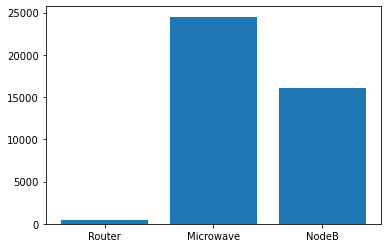

In [24]:
plt.figure()
plt.bar(name, num)
plt.show()

In [25]:
# nx.draw_networkx(alarm_graph)
# plt.show()

In [26]:
'45b91d4df492c75d051889730cc99936' in alarm_graph.nodes

True

In [27]:
G = alarm_graph.subgraph('e0dda6e46790c3f5e4eca1279fc1a569')

In [28]:
G

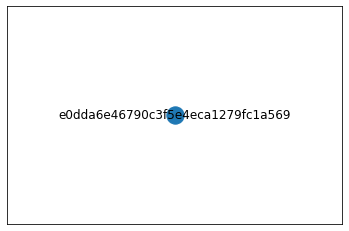

In [29]:
nx.draw_networkx(G)
plt.show()

In [30]:
for i in range(len(alarm_graph.nodes)):
    if alarm_graph.nodes[list(alarm_graph.nodes)[i]]['NE_TYPE'] == 'ROUTER':
        print(i)

3
7
13
18
24
34
38
42
47
51
55
60
66
73
79
86
91
98
110
114
120
128
132
138
151
152
158
173
177
184
195
203
214
218
226
230
234
259
265
271
275
281
290
296
301
314
321
324
330
337
347
351
357
369
381
385
389
394
398
402
421
431
441
447
456
469
475
479
484
505
513
530
545
552
556
574
591
608
612
619
645
652
676
690
744
750
766
771
787
805
853
859
872
877
881
906
913
929
954
996
1018
1027
1048
1115
1128
1165
1189
1201
1219
1223
1235
1282
1288
1307
1383
1403
1419
1435
1446
1519
1587
1607
1617
1651
1658
1673
1740
1745
1783
1819
1860
1879
2002
2054
2057
2208
2220
2232
2259
2276
2320
2434
2563
2708
3022
3064
3332
3368
3391
3612
4115
4284
5095
10512
10518
10528
10534
10543
10551
10555
10560
10569
10578
10584
10592
10597
10605
10623
10631
10635
10640
10646
10652
10664
10671
10677
10683
10688
10701
10709
10713
10714
10719
10734
10768
10776
10789
10795
10801
10807
10815
10827
10836
10843
10852
10856
10862
10871
10878
10882
10891
10895
10908
10912
10922
10930
10936
10942
10954
10966
10968
10974
1

In [31]:
alarm_graph.edges

EdgeView([('83fc7cfd587db142017f6054f0c7ac8f', '2ad9f5d287773bf5b539a78223872f25'), ('2ad9f5d287773bf5b539a78223872f25', 'e0dda6e46790c3f5e4eca1279fc1a569'), ('e0dda6e46790c3f5e4eca1279fc1a569', '78c6f3710215a32fbd9d5370d0f68950'), ('e0dda6e46790c3f5e4eca1279fc1a569', 'e8aaaf9a8ad6ecd00e947c1bc38260a3'), ('e0dda6e46790c3f5e4eca1279fc1a569', 'f0e977a2e8018975804857e73bcc3626'), ('e0dda6e46790c3f5e4eca1279fc1a569', '96b82f2904321e00d9d542f240fce42f'), ('e0dda6e46790c3f5e4eca1279fc1a569', '257095ed9e7cbcbc65f617a898be4558'), ('e0dda6e46790c3f5e4eca1279fc1a569', 'd05abe27c75a438a8f805d0ebc282a73'), ('e0dda6e46790c3f5e4eca1279fc1a569', 'aa86b496c58b4956aa829427a99ae7d7'), ('78c6f3710215a32fbd9d5370d0f68950', 'ceef3ac34c3244515e4e15c57bc0e15a'), ('78c6f3710215a32fbd9d5370d0f68950', 'ab00f3c329d4aa2ba6fd3fdcebc89d94'), ('78c6f3710215a32fbd9d5370d0f68950', '892bdf33802fe8c86eecabaaab4df65f'), ('7dd1911a6ea9fa4ae4579d0d5caa7236', '9d0b387292085c0fbc6e72ffdd0d033c'), ('9d0b387292085c0fbc6e72ffdd

In [38]:
G = nx.Graph()

In [39]:
G.add_node('e0dda6e46790c3f5e4eca1279fc1a569')

In [40]:
G.nodes

NodeView(('e0dda6e46790c3f5e4eca1279fc1a569',))

In [41]:
for i in range(100):
    if 'e0dda6e46790c3f5e4eca1279fc1a569' in list(alarm_graph.edges)[i]:
        G.add_edge(list(alarm_graph.edges)[i][0],list(alarm_graph.edges)[i][1])

In [42]:
G.edges

EdgeView([('e0dda6e46790c3f5e4eca1279fc1a569', '2ad9f5d287773bf5b539a78223872f25'), ('e0dda6e46790c3f5e4eca1279fc1a569', '78c6f3710215a32fbd9d5370d0f68950'), ('e0dda6e46790c3f5e4eca1279fc1a569', 'e8aaaf9a8ad6ecd00e947c1bc38260a3'), ('e0dda6e46790c3f5e4eca1279fc1a569', 'f0e977a2e8018975804857e73bcc3626'), ('e0dda6e46790c3f5e4eca1279fc1a569', '96b82f2904321e00d9d542f240fce42f'), ('e0dda6e46790c3f5e4eca1279fc1a569', '257095ed9e7cbcbc65f617a898be4558'), ('e0dda6e46790c3f5e4eca1279fc1a569', 'd05abe27c75a438a8f805d0ebc282a73'), ('e0dda6e46790c3f5e4eca1279fc1a569', 'aa86b496c58b4956aa829427a99ae7d7')])

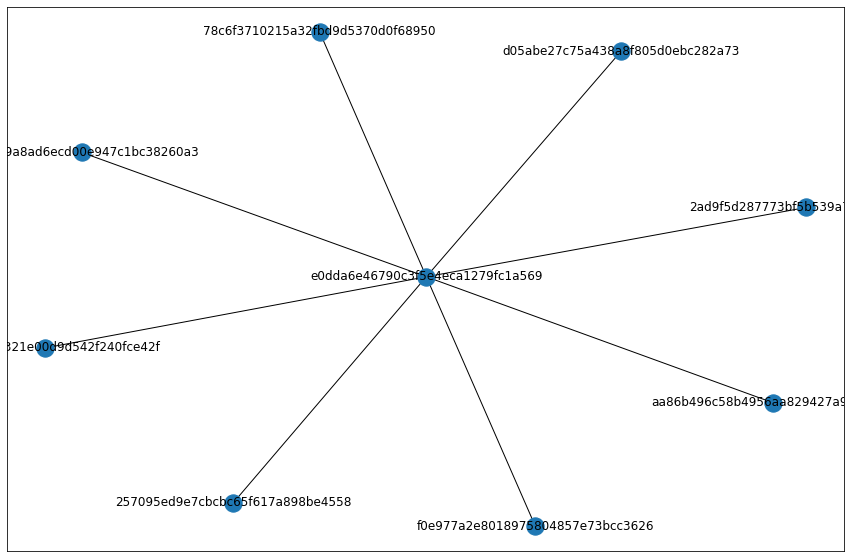

In [44]:
plt.figure(figsize=(15, 10))
nx.draw_networkx(G)
plt.show()